In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import missingno

In [2]:
data = pd.read_csv('MARKET_Car_Prices.csv')
data.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.drop_duplicates(inplace=True)

Checking the amount of NAs in the dataset

In [4]:
data.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [5]:
# missingno.matrix(df)
# plt.show()

Let's first drop the rows that have NA's in **price** column anyway

In [6]:
data.dropna(subset=['price'], inplace=True)

In [7]:
na_rows_frac = 1 - data.dropna().shape[0] / data.shape[0]
print(f'The fraction of rows with na values after dropping price is {na_rows_frac}')

The fraction of rows with na values after dropping price is 0.03980099502487566


It's less than 4%, so we can drop the rest as well.

In [8]:
data.dropna(inplace=True)
data.shape

(193, 24)

In [9]:
data.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'{column} -- {data[column].unique()}', end='\n\n')

make -- ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

fuel_type -- ['gas' 'diesel']

aspiration -- ['std' 'turbo']

num_of_doors -- ['two' 'four']

body_style -- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels -- ['rwd' 'fwd' '4wd']

engine_location -- ['front' 'rear']

engine_type -- ['dohc' 'ohcv' 'ohc' 'l' 'ohcf']

num_of_cylinders -- ['four' 'six' 'five' 'three' 'twelve' 'eight']

fuel_system -- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' 'idi' 'spdi']



Below is some code convert some categorical variables to numeric

In [11]:
numbers_mapping = {'two': 2, 'four': 4, 'six':6,
                  'five': 5, 'three': 3, 'twelve': 12, 'eight': 8}
for col in ['num_of_doors', 'num_of_cylinders']:
    col_str = data[col].astype(str)
    col_nums = [numbers_mapping.get(w, w) for w in col_str]
    data[col] = col_nums

Here is the discription of the columns that are present in my dataframe:

- **make**: The brand or manufacturer of the vehicle.
- **fuel_type**: The type of fuel used by the vehicle, either "gas" or "diesel".
- **aspiration**: The type of aspiration used by the vehicle's engine, either "std" (standard) or "turbo" (turbocharged).
- **num_of_doors**: The number of doors on the vehicle, either 2 or 4.
- **body_style**: The shape or style of the vehicle's body, such as "sedan", "hatchback", "convertible", etc.
- **drive_wheels**: The configuration of the vehicle's drive wheels, either "4wd" (four-wheel drive), "fwd" (front-wheel drive), or "rwd" (rear-wheel drive).
- **engine_location**: The location of the vehicle's engine, either "front" or "rear".
- **wheel_base**: The distance between the centers of the front and rear wheels of the vehicle.
- **length**: The overall length of the vehicle.
- **width**: The overall width of the vehicle.
- **height**: The overall height of the vehicle.
- **curb_weight**: The weight of the vehicle without any passengers or cargo.
- **engine_type**: The type of engine used by the vehicle, such as "dohc", "ohv", "ohc", etc.
- **num_of_cylinders**: The number of cylinders in the vehicle's engine.
- **engine_size**: The size of the vehicle's engine, typically measured in liters.
- **fuel_system**: The type of fuel system used by the vehicle's engine, such as "mpfi", "2bbl", etc.
- **bore**: The diameter of the cylinders in the engine.
- **stroke**: The distance that the piston travels inside the cylinder.
- **compression_ratio**: The ratio of the volume inside the cylinder when the piston is at the bottom of its stroke to the volume inside the cylinder when the piston is at the top of its stroke.
- **horsepower**: The power output of the engine, typically measured in horsepower.
- **peak_rpm**: The engine speed at which the maximum horsepower is produced.
- **city_mpg**: The vehicle's fuel economy in miles per gallon (mpg) while driving in city conditions.
- **highway_mpg**: The vehicle's fuel economy in miles per gallon (mpg) while driving on highways.
- **price**: The price of the vehicle, typically measured in a particular currency (e.g. USD, EUR, etc.).

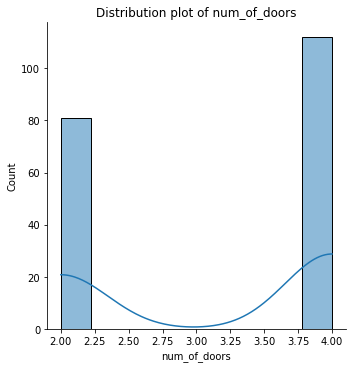

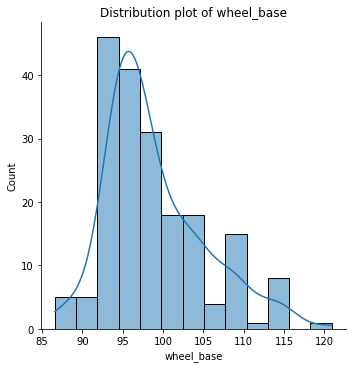

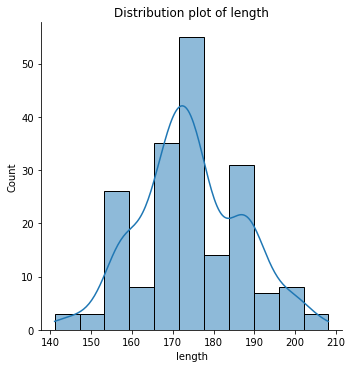

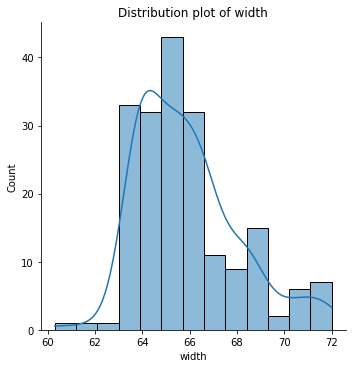

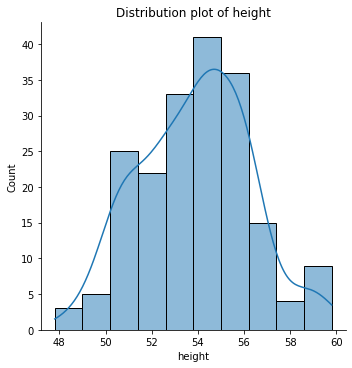

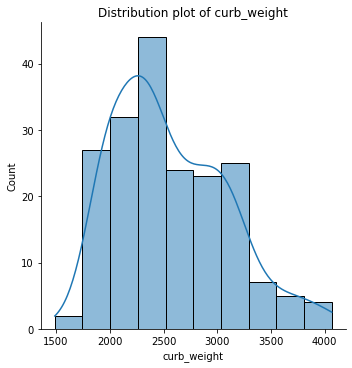

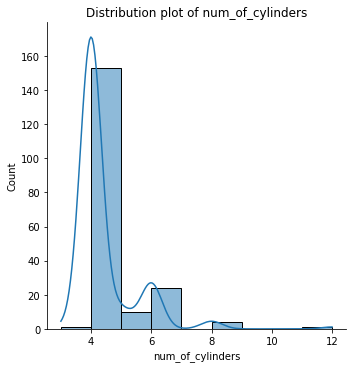

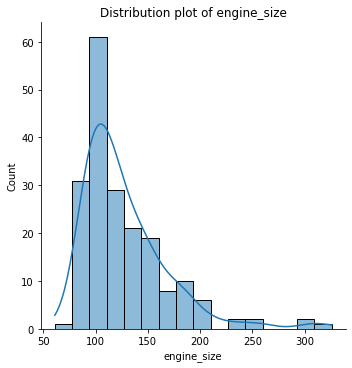

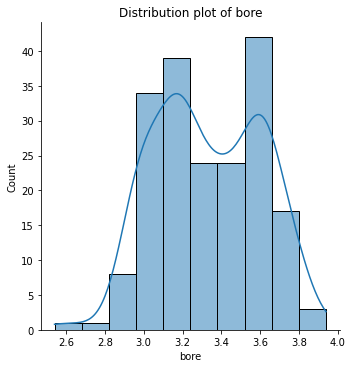

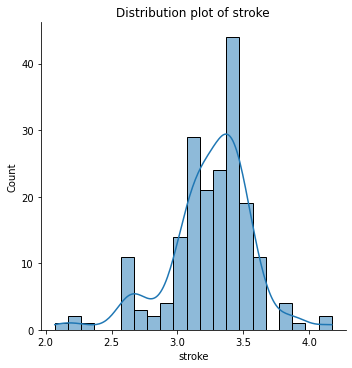

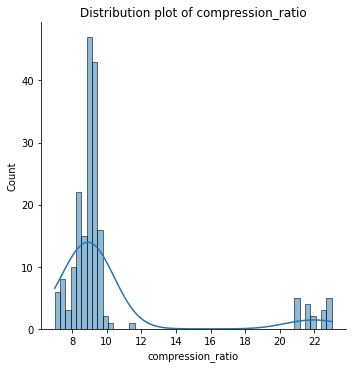

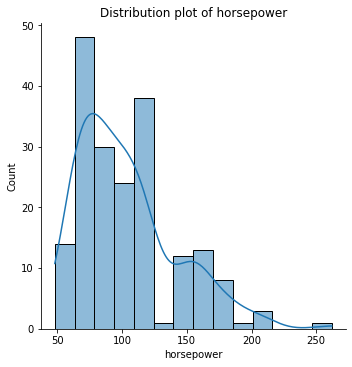

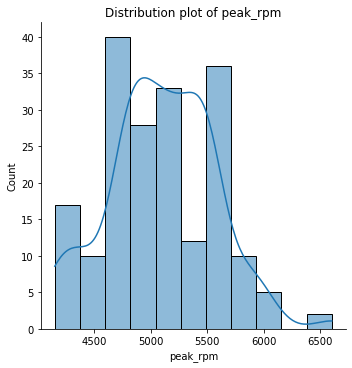

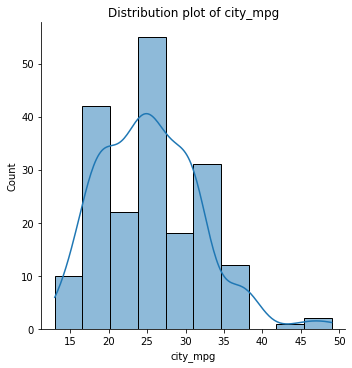

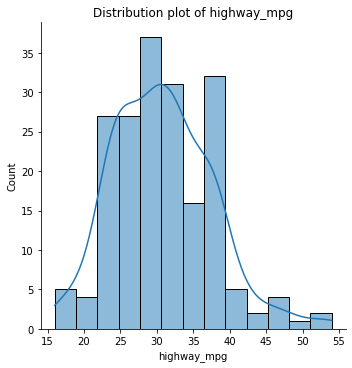

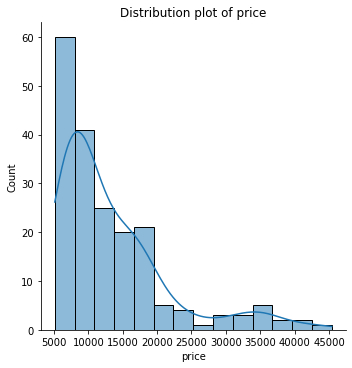

In [12]:
numeric_columns = data.columns[data.dtypes != 'object']

for col in numeric_columns:
    sns.displot(data[col], kde=True)
    plt.title(f'Distribution plot of {col}')
    plt.show()

Bellow I mapped each brand to the country of origin to see the **Average Price of each**

In [13]:
brand_country_map = {
    'alfa-romero': 'Italy',
    'audi': 'Germany',
    'bmw': 'Germany',
    'chevrolet': 'United States',
    'dodge': 'United States',
    'honda': 'Japan',
    'isuzu': 'Japan',
    'jaguar': 'United Kingdom',
    'mazda': 'Japan',
    'mercedes-benz': 'Germany',
    'mercury': 'United States',
    'mitsubishi': 'Japan',
    'nissan': 'Japan',
    'peugot': 'France',
    'plymouth': 'United States',
    'porsche': 'Germany',
    'saab': 'Sweden',
    'subaru': 'Japan',
    'toyota': 'Japan',
    'volkswagen': 'Germany',
    'volvo': 'Sweden'
}

data['production_country'] = data['make'].map(brand_country_map)

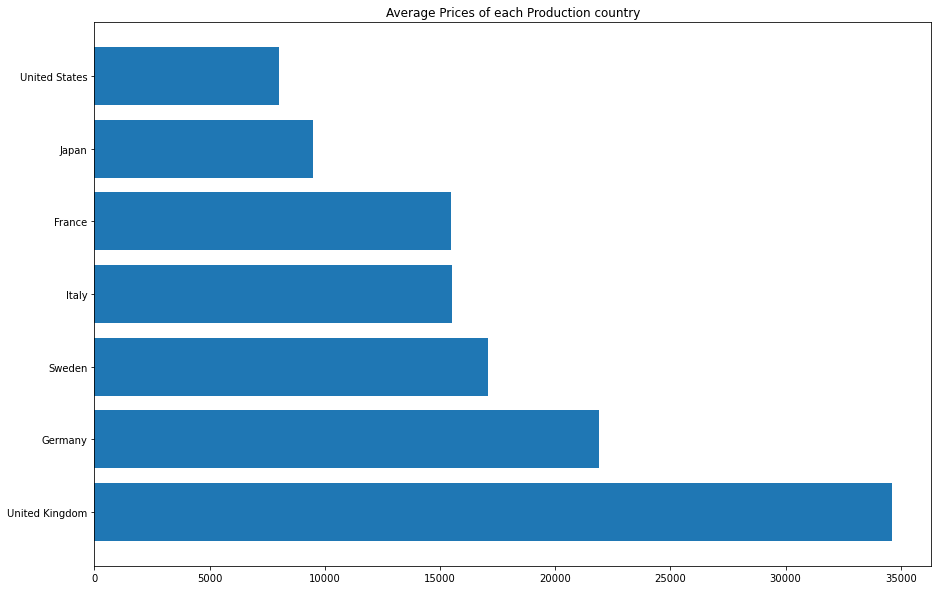

In [14]:
rating_country = data.groupby(by = 'production_country')['price'].mean().sort_values(ascending=False)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=rating_country.index, width=rating_country.values)

plt.title('Average Prices of each Production country')
plt.show()

In [15]:
rainbow_color_codes = ['#FF0000','#FFA500','#F9E79F','#008000','#0000FF','#4B0082','#EE82EE']
color_mapping = dict(zip(set(brand_country_map.values()), rainbow_color_codes))

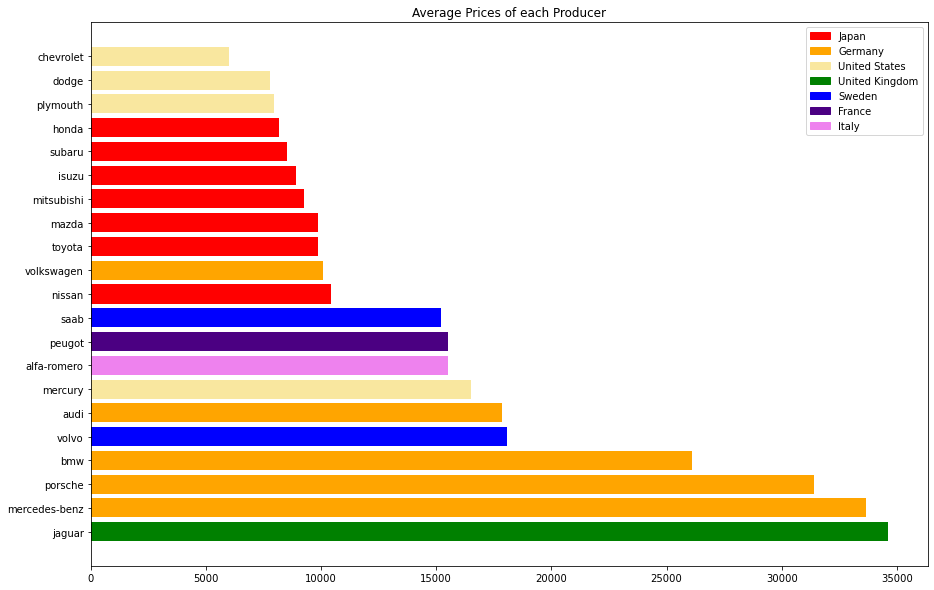

In [16]:
rating_producer = data.groupby(by = ['make', 'production_country'])['price'].mean().sort_values(ascending=False)
rating_producer = rating_producer.reset_index('production_country')
rating_producer['color'] = rating_producer.production_country.map(color_mapping)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.barh(y=rating_producer.index, width=rating_producer.price, color=rating_producer.color)

legend_handles = []
for country, color_code in color_mapping.items():
    legend_handles.append(plt.Rectangle((0,0),1,1, color=color_code, label=country))
ax.legend(handles=legend_handles)

plt.title('Average Prices of each Producer')
plt.show()

The plot above basically shows how the average prices are distributed betweem both **the brands** and **the countries of origin**.

### Scatter plot of price vs. engine size

This visualization shows the relationship between the size of the vehicle's engine and its price. 

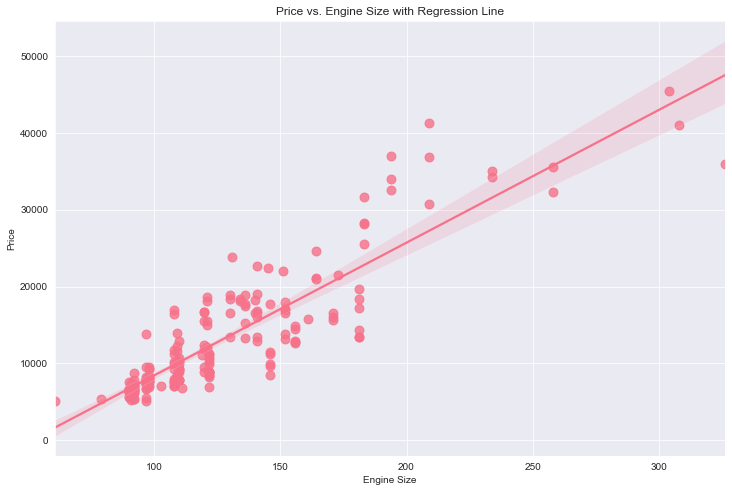

In [21]:
sns.set_style('darkgrid')
sns.set_palette('husl')

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x='engine_size', y='price', data=data, scatter_kws={'s':80}, ax=ax)

ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')
ax.set_title('Price vs. Engine Size with Regression Line')

plt.show()

### Average City and Highway Fuel Economy by Make

This visualization compares the fuel efficiency of different makes of vehicles.

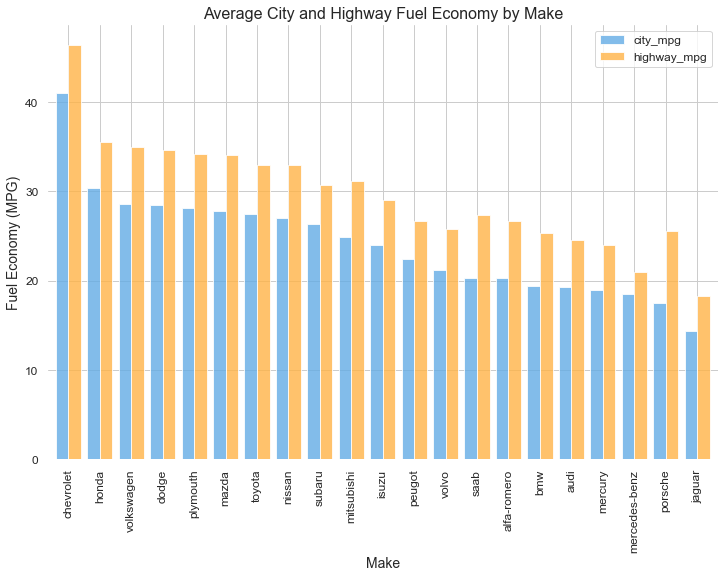

In [22]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

fuel_economy = data.groupby('make')[['city_mpg', 'highway_mpg']].mean().sort_values(by='city_mpg', ascending=False)
fuel_economy.plot(kind='bar', ax=ax, color=['#63ACE5', '#FFB347'], alpha=0.8, width=0.8)

ax.set_xlabel('Make', fontsize=14)
ax.set_ylabel('Fuel Economy (MPG)', fontsize=14)
ax.set_title('Average City and Highway Fuel Economy by Make', fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)

plt.legend(fontsize=12)

plt.show()

### Horsepower by fuel type

This visualization demonstrates the distribution of horsepower for different fuel types.

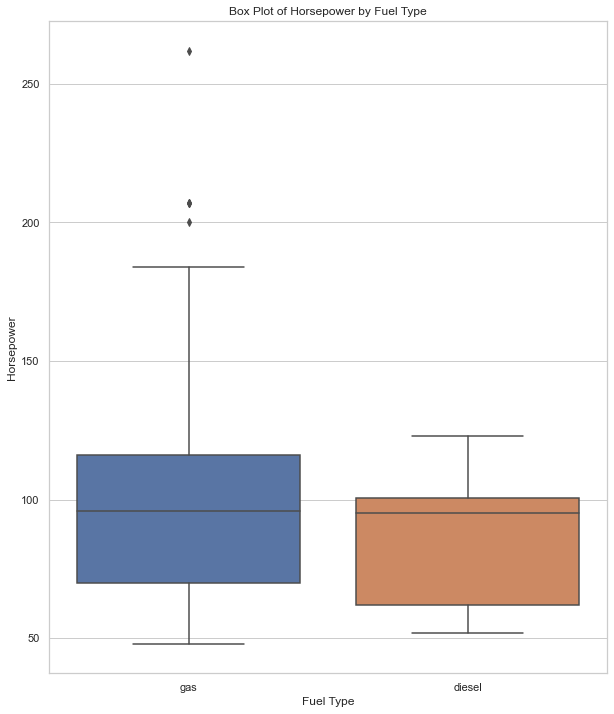

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 12))

sns.boxplot(x='fuel_type', y='horsepower', data=data)

plt.title('Box Plot of Horsepower by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Horsepower')

plt.show()

### Histogram of curb weight
This visualization shows the distribution of curb weights for the vehicles in the dataset.

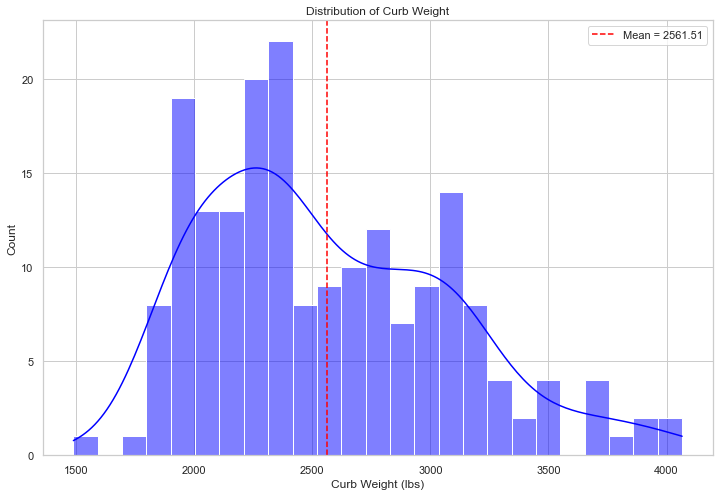

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data, x='curb_weight', bins=25, kde=True, color='blue', alpha=0.5)

mean_curb_weight = data.curb_weight.mean()
ax.axvline(mean_curb_weight, color='red', linestyle='--', label=f'Mean = {mean_curb_weight:.2f}')

ax.set_title('Distribution of Curb Weight')
ax.set_xlabel('Curb Weight (lbs)')
ax.set_ylabel('Count')

ax.legend()

plt.show()

### Heatmap of correlations between variables

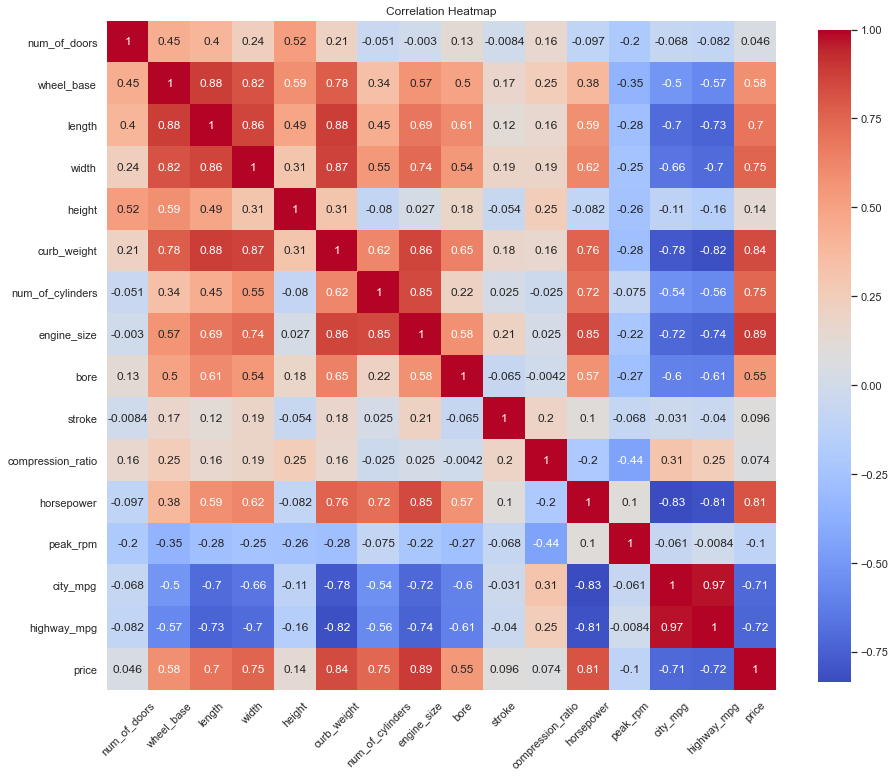

In [65]:
fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink':0.8})

plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

### Pairwise visualisation

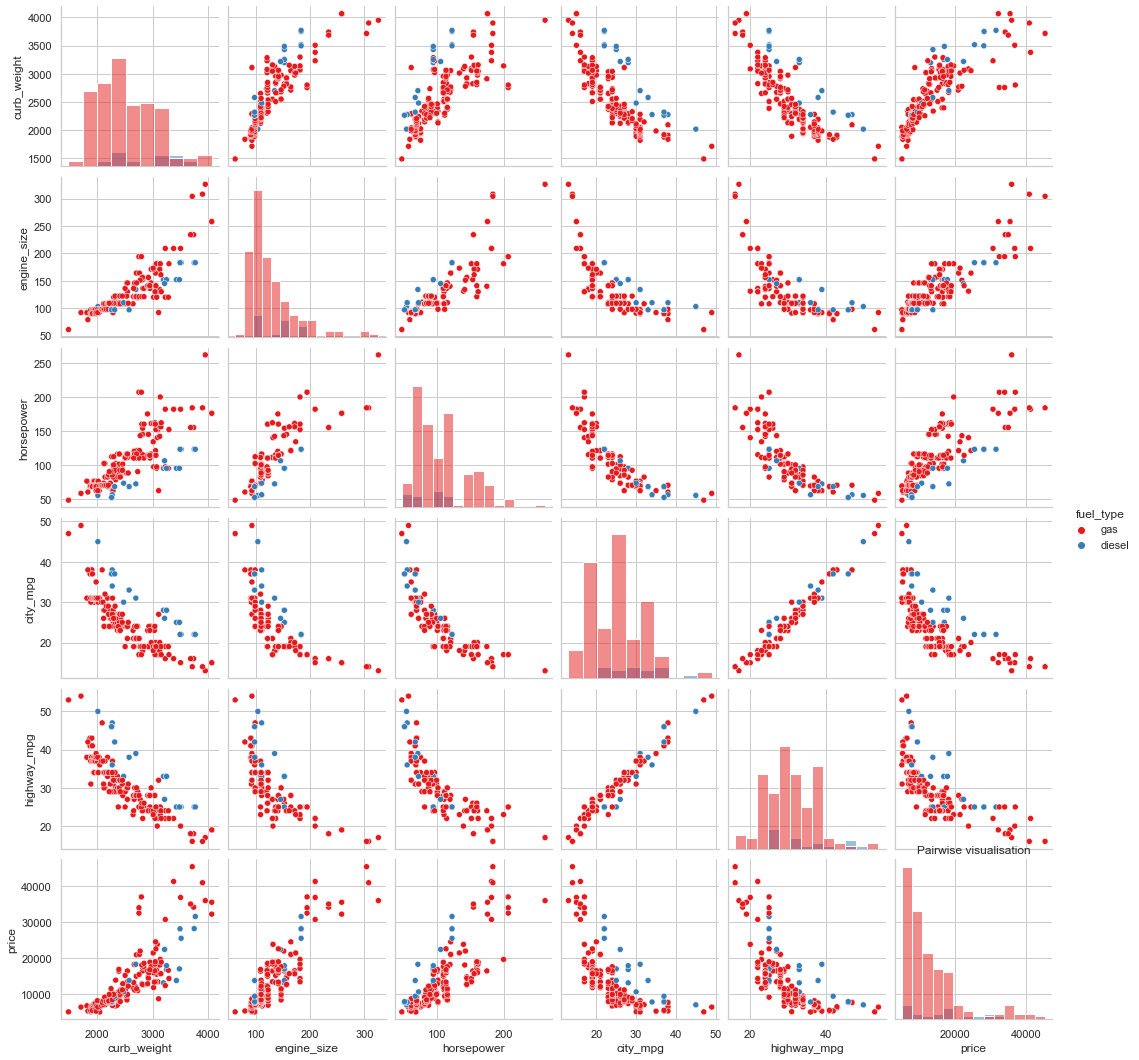

In [73]:
columns_of_interest = ['fuel_type', 'curb_weight', 'engine_size', 
                       'horsepower', 'city_mpg', 'highway_mpg', 'price']

sns.pairplot(data[columns_of_interest], hue='fuel_type', diag_kind='hist', palette='Set1')

plt.title('Pairwise visualisation')
plt.show()